In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit

import acquire as a
import prepare as p

import warnings
warnings.filterwarnings('ignore')

# Exercise

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [2]:
# Starting with superstore dataset
df = p.get_superstore_df()

In [3]:
df.head()

,sale_amount,item_price,sales_total,month,day_of_week,item_id,store_id,sale_id,item_name,item_brand,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,13.0,0.84,10.92,January,Tuesday,1,1,1,Riceland American Jazmine Rice,Riceland,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01,26.0,1.16,30.16,January,Tuesday,17,3,295813,Ducal Refried Red Beans,Ducal,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01,32.0,9.64,308.48,January,Tuesday,7,10,125995,Twinings Of London Classics Lady Grey Tea - 20 Ct,Twinings Of London,70177154004,8503 NW Military Hwy,San Antonio,TX,78231
2013-01-01,45.0,4.39,197.55,January,Tuesday,18,3,314073,Scotch Removable Clear Mounting Squares - 35 Ct,Scotch,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01,34.0,0.74,25.16,January,Tuesday,19,3,332333,Careone Family Comb Set - 8 Ct,Careone,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201


In [4]:
tscv = TimeSeriesSplit(n_splits=2)

In [5]:
train_index, test_index = next(tscv.split(df))

In [6]:
train_index

array([     0,      1,      2, ..., 304331, 304332, 304333])

In [7]:
test_index

array([304334, 304335, 304336, ..., 608664, 608665, 608666])

In [8]:
train = df.iloc[train_index]
test = df.iloc[test_index]

In [9]:
train.head()

,sale_amount,item_price,sales_total,month,day_of_week,item_id,store_id,sale_id,item_name,item_brand,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,13.0,0.84,10.92,January,Tuesday,1,1,1,Riceland American Jazmine Rice,Riceland,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01,26.0,1.16,30.16,January,Tuesday,17,3,295813,Ducal Refried Red Beans,Ducal,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01,32.0,9.64,308.48,January,Tuesday,7,10,125995,Twinings Of London Classics Lady Grey Tea - 20 Ct,Twinings Of London,70177154004,8503 NW Military Hwy,San Antonio,TX,78231
2013-01-01,45.0,4.39,197.55,January,Tuesday,18,3,314073,Scotch Removable Clear Mounting Squares - 35 Ct,Scotch,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01,34.0,0.74,25.16,January,Tuesday,19,3,332333,Careone Family Comb Set - 8 Ct,Careone,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201


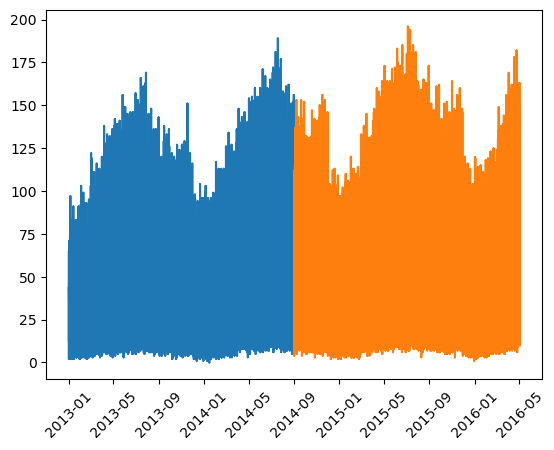

In [10]:
plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)
plt.xticks(rotation=45)
plt.show()

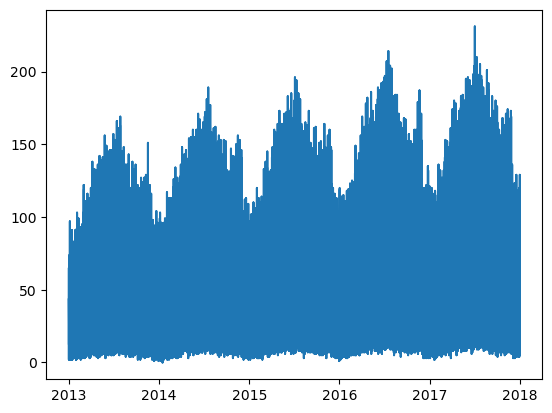

In [11]:
# TimeSeriesSplit doesn't seem too logical, so now I'll plot the whole df and split on something human based
plt.plot(df.index, df.sale_amount)

In [197]:
# splitting on year; train is everything before 1 Jan 2017, test is all of 2017
train = df.loc[:'2016']
test = df.loc['2017':]

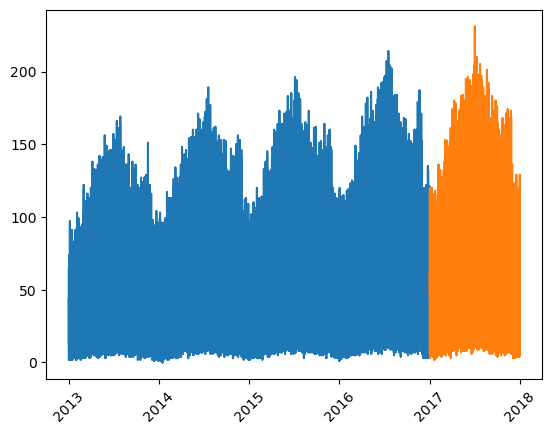

In [198]:
# replot
plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)
plt.xticks(rotation=45)
plt.show()

In [199]:
# put target sale_amount into y for ease
y= train.sale_amount
y.head()

sale_date
2013-01-01    13.0
2013-01-01    26.0
2013-01-01    32.0
2013-01-01    45.0
2013-01-01    34.0
Name: sale_amount, dtype: float64

<AxesSubplot:ylabel='Frequency'>

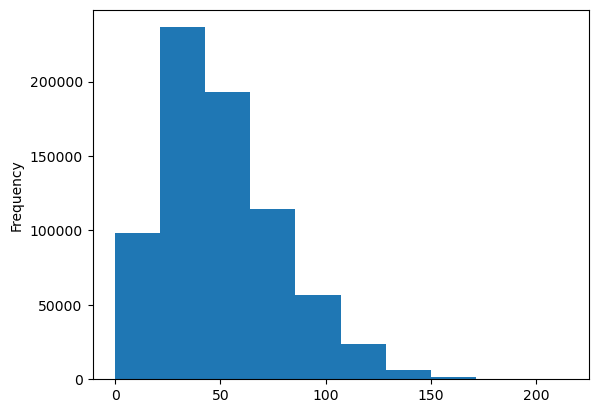

In [200]:
# don't consider time series for now
y.plot.hist()

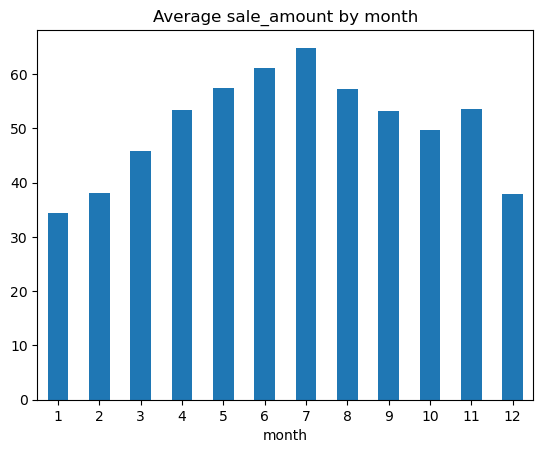

In [201]:
# plot monthly means
y.groupby(y.index.month).mean().plot.bar()
plt.title('Average sale_amount by month')
plt.xticks(rotation=0)
plt.xlabel('month')
plt.show()

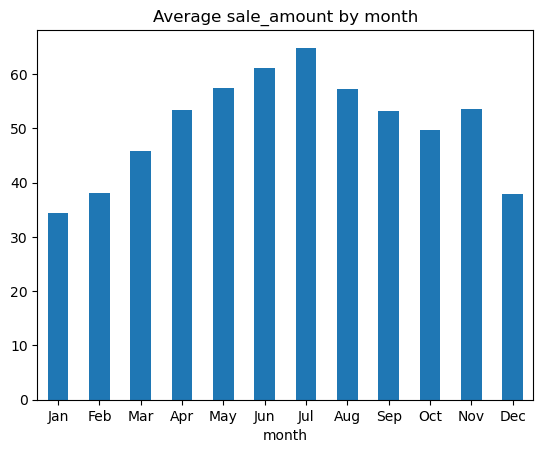

In [267]:
# another way to plot by month
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
plt.title('Average sale_amount by month')
plt.xlabel('month')
plt.show()

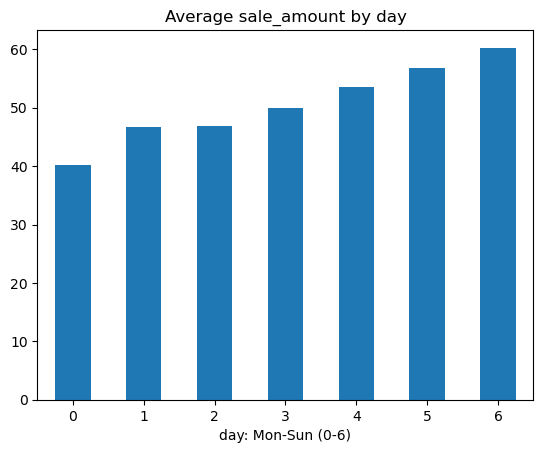

In [202]:
# plot daily means
y.groupby(y.index.weekday).mean().plot.bar()
plt.title('Average sale_amount by day')
plt.xticks(rotation=0)
plt.xlabel('day: Mon-Sun (0-6)')
plt.show()

In [203]:
# see if I can make the plot above, but with day names (Mon, Tues, etc.)
# This code gives a warning:  

# train['weekday'] = train.index.day_name()

# this code does NOT give the warning, but it's cumbersome, and I don't quite see the point of the warning
# SO, I'm ignoring the warning for now.

# train_copy = train.copy()
# train_copy.loc[:, 'weekday'] = train.index.day_name()

In [204]:
train['weekday'] = train.index.day_name()

In [205]:
train['num_day'] = train.index.weekday

In [206]:
train.columns

Index(['sale_amount', 'item_price', 'sales_total', 'month', 'day_of_week',
       'item_id', 'store_id', 'sale_id', 'item_name', 'item_brand',
       'item_upc14', 'store_address', 'store_city', 'store_state',
       'store_zipcode', 'weekday', 'num_day'],
      dtype='object')

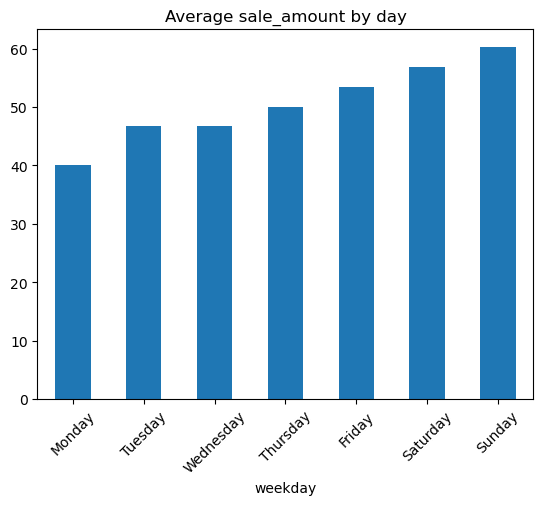

In [207]:
# plot daily means with day_name as the x axis
train.groupby('weekday').mean().sort_values('num_day').sale_amount.plot.bar()
plt.title('Average sale_amount by day')
plt.xticks(rotation=45)
plt.show()

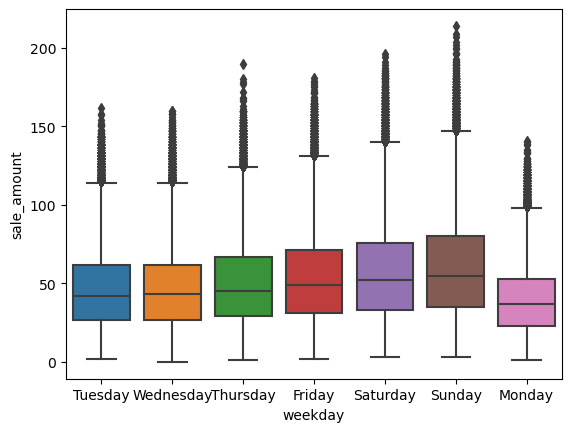

In [208]:
sns.boxplot(data=train, x='weekday', y='sale_amount')
plt.show()

<AxesSubplot:xlabel='sale_date'>

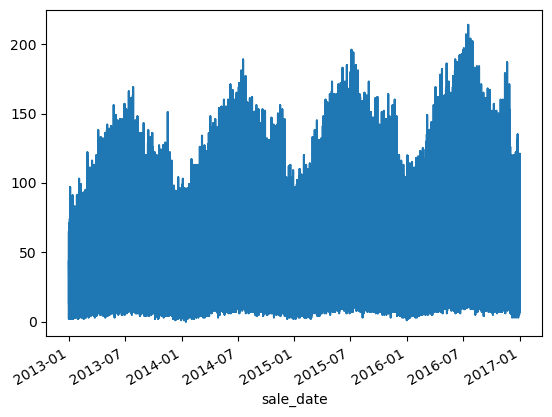

In [209]:
y.plot()

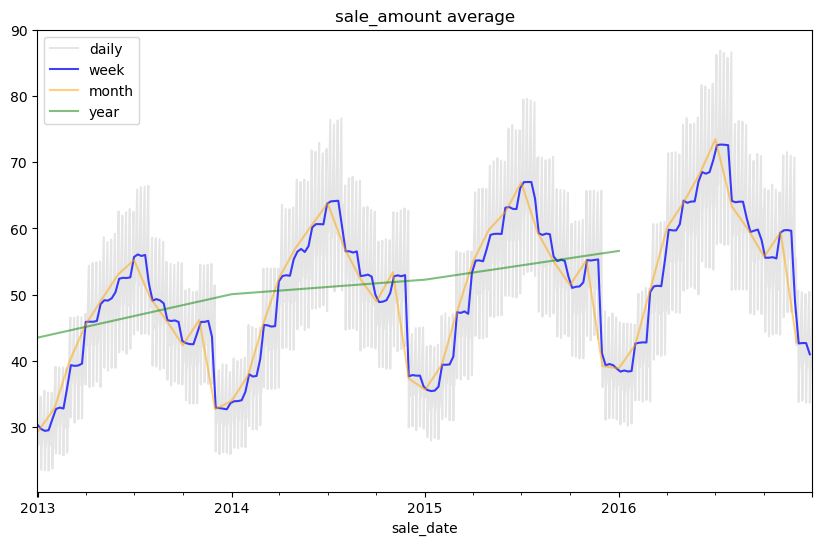

In [210]:
# plotting daily/weekly/monthly/quarterly/yearly average sale_amount
plt.figure(figsize=(10,6))
y.resample('D').mean().plot(label='daily', c='gray', alpha=.2)
y.resample('W').mean().plot(label='week', c='blue', alpha=.75)
y.resample('M').mean().plot(label='month', c='orange', alpha=0.5)
# y.resample('3M').mean().plot(label='quarter', c='red', alpha=0.3)
y.resample('Y').mean().plot(label='year', c='green', alpha=0.5)
plt.title('sale_amount average')
plt.legend()
plt.show()

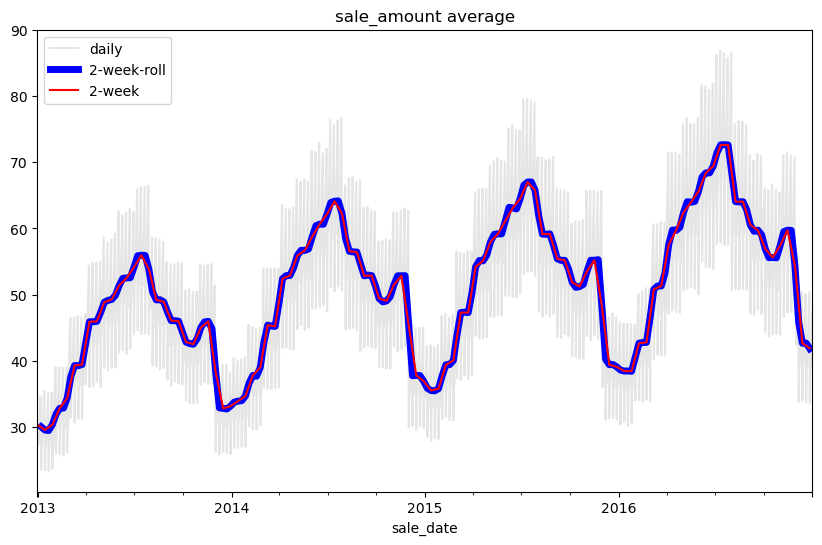

In [211]:
# plotting rolling averages: looks like a 2-week rolling average is basically the same as resample 2W
# the two week is slightly more smoothed out than the two-week rolling
plt.figure(figsize=(10,6))
y.resample('D').mean().plot(label='daily', c='gray', alpha=.2)
y.resample('W').mean().rolling(2).mean().plot(label='2-week-roll', c='blue', linewidth=5)
y.resample('2W').mean().plot(label='2-week', c='red')
# y.resample('M').mean().plot(label='month', c='orange', alpha=0.5)
# y.resample('3M').mean().plot(label='quarter', c='red', alpha=0.3)
# y.resample('Y').mean().plot(label='year', c='green', alpha=0.5)
plt.title('sale_amount average')
plt.legend()
plt.show()

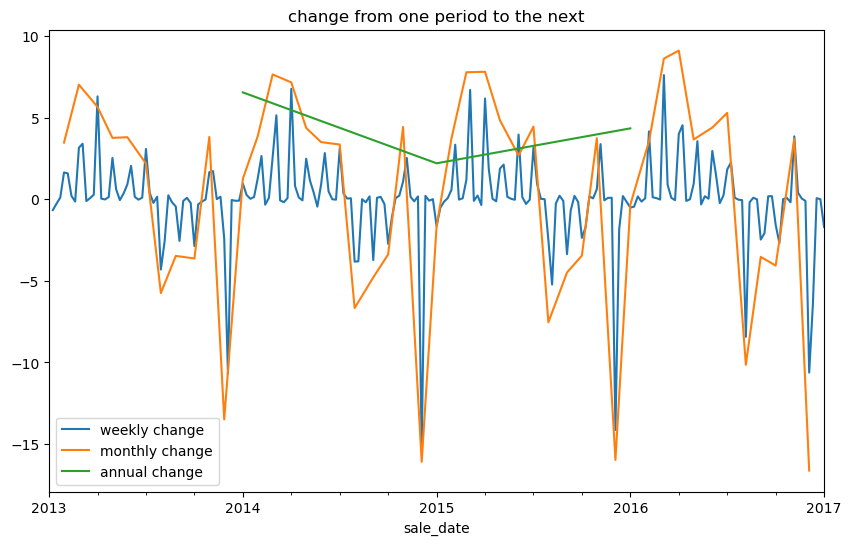

In [212]:
# visualizing change over time, weekly differences
plt.figure(figsize=(10,6))
y.resample('W').mean().diff().plot(label='weekly change')
# y.resample('2W').mean().diff().plot(label='2-week change')
y.resample('M').mean().diff().plot(label='monthly change')
y.resample('Y').mean().diff().plot(label='annual change')
plt.title('change from one period to the next')
plt.legend()
plt.show()

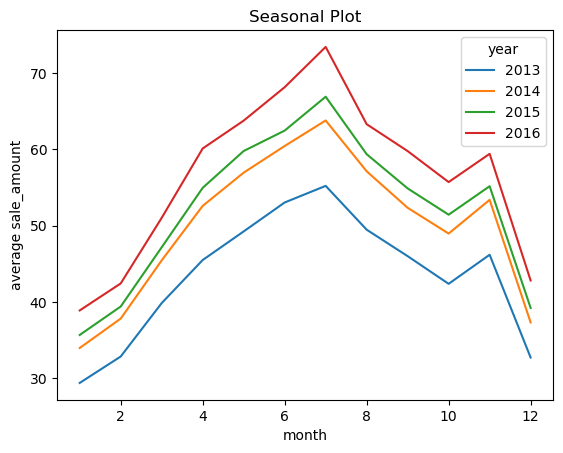

In [213]:
# Let's try a seasonal plot
# grouping by year, month creates a multilevel index
# unstack takes the second level of the index and turns it into columns or (with (0) into rows
# I tried it with week, and it seemed less clear and more cluttered than month
# plt.figure(figsize=(10,6))
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.legend(title='year')
plt.xlabel('month')
plt.ylabel('average sale_amount')
plt.show()

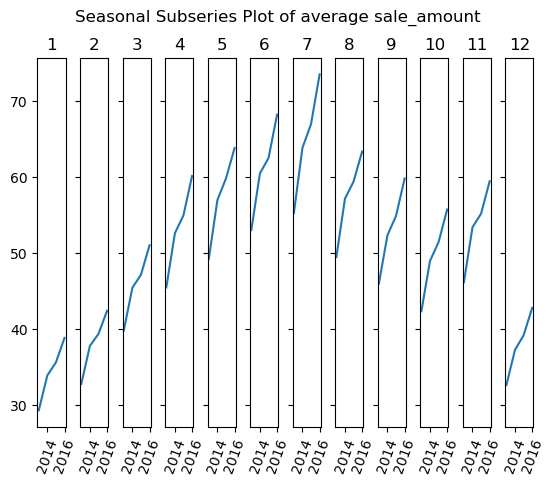

In [214]:
# make a seasonal subseries plot (by copying code from curriculum

table = y.groupby([y.index.year, y.index.month]).mean().unstack(0)

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iterrows()):
    subset.plot(ax=ax, title=month)
    # ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    ax.set_xticklabels([int(thing) for thing in ax.get_xticks()], rotation = 70)

fig.suptitle('Seasonal Subseries Plot of average sale_amount') # super-title for the overall figure
fig.subplots_adjust(wspace=0.5)


In [215]:
# Lag plots
# first make a temp series with means for each day so each row is a single day
temp = y.resample('D').mean()

In [216]:
# standardize the x-y axis scales for the plots so we can see patterns more easily
x_y_range = range(20,100,10)

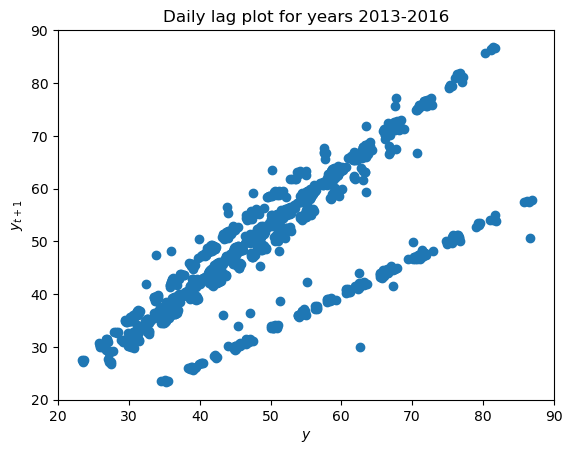

In [218]:
# plot all days lagged by one day for the training dataset (2013-2017
plt.scatter(temp, temp.shift(-1))
plt.title('Daily lag plot for years 2013-2016')
plt.xlabel('$y$')
plt.xticks(ticks=x_y_range)
plt.ylabel('$y_{t+1}$')
plt.yticks(ticks=x_y_range)
plt.show()

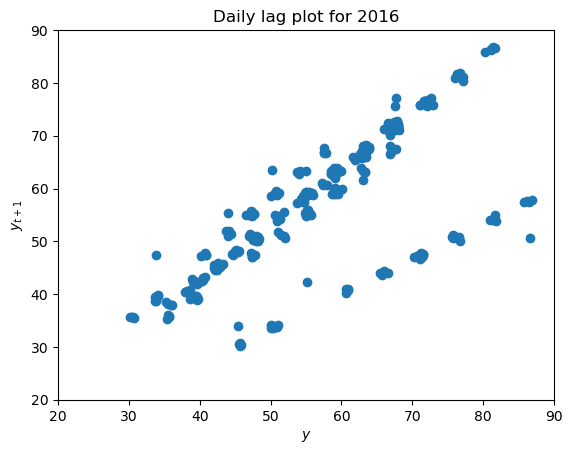

In [228]:
# there are about 4 pretty clear lines in the plot above
# but there is definitely 2 clear lines. First I investigated if it
# was happening in one year (maybe the bottom line is a specific year)
plt.scatter(temp.loc['2016'], temp.loc['2016'].shift(-1))
plt.title('Daily lag plot for 2016')
plt.xlabel('$y$')
plt.ylabel('$y_{t+1}$')
plt.xticks(ticks=x_y_range)
plt.yticks(ticks=x_y_range)
plt.show()

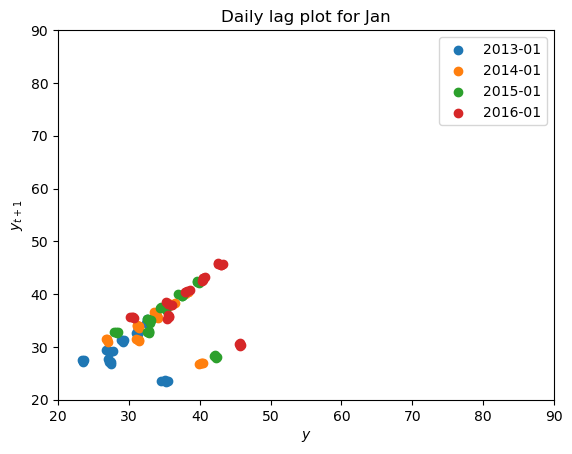

In [229]:
# 2016 had the same two lines, so it's happening every year
# then I thought I would look at one month (January)
januaries = ['2013-01', '2014-01', '2015-01', '2016-01']
for jan in januaries:
    plt.scatter(temp.loc[jan], temp.loc[jan].shift(-1),label=jan)
plt.title('Daily lag plot for Jan')
plt.xlabel('$y$')
plt.ylabel('$y_{t+1}$')
plt.xticks(ticks=x_y_range)
plt.yticks(ticks=x_y_range)
plt.legend()
plt.show()

In [231]:
# so the two lines are occurring in January as well.
# Then I remembered there was a drop off in sale_amount from Sunday to Monday (the ah ha moment)
# So, I made a temporary dataframe to capture each day's mean, a shift to the next day, 
# and then just get all the Sundays (and the corresponding Monday's) means
temp_df = pd.DataFrame(temp)
temp_df['y(t+1)'] = temp_df.sale_amount.shift(-1)
sundays = temp_df[temp_df.index.weekday == 6]
sundays.head()

,sale_amount,y(t+1)
sale_date,,
2013-01-06,34.582,23.538
2013-01-13,35.482,23.492
2013-01-20,35.224,23.418
2013-01-27,35.158,23.696
2013-02-03,39.088,25.996


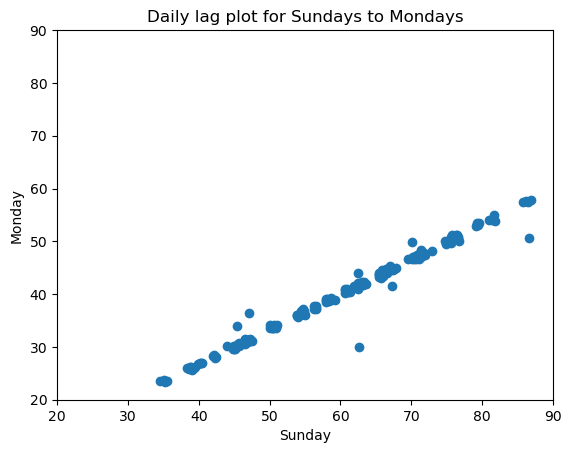

In [232]:
# Now plot the Sundays and sure enough, the bottom line is displayed
plt.scatter(sundays['sale_amount'], sundays['y(t+1)'])
plt.title('Daily lag plot for Sundays to Mondays')
plt.xlabel('Sunday')
plt.ylabel('Monday')
plt.xticks(ticks=x_y_range)
plt.yticks(ticks=x_y_range)
plt.show()

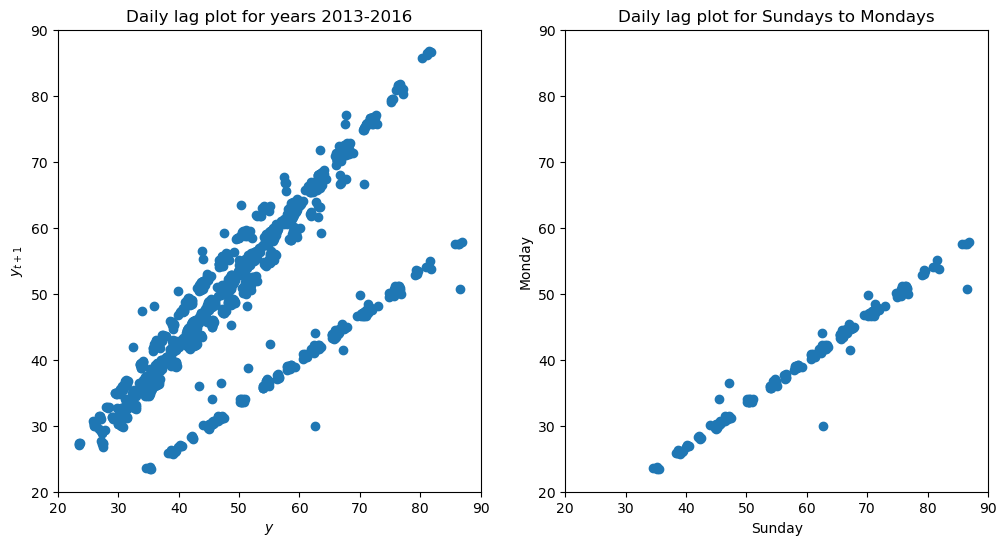

In [233]:
# Now put the plots side by side so it's easier to see
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(temp, temp.shift(-1))
plt.title('Daily lag plot for years 2013-2016')
plt.xlabel('$y$')
plt.xticks(ticks=x_y_range)
plt.ylabel('$y_{t+1}$')
plt.yticks(ticks=x_y_range)

plt.subplot(1,2,2)
plt.scatter(sundays['sale_amount'], sundays['y(t+1)'])
plt.title('Daily lag plot for Sundays to Mondays')
plt.xlabel('Sunday')
plt.ylabel('Monday')
plt.xticks(ticks=x_y_range)
plt.yticks(ticks=x_y_range)
plt.show()

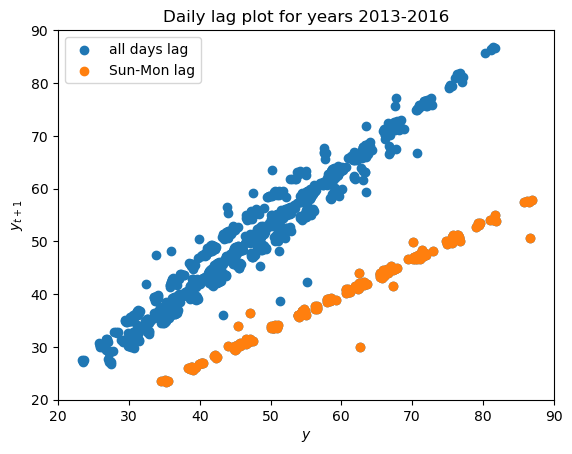

In [236]:
# then I thought, I bet I could put this all on one plot with different colors
# Now put the plots side by side so it's easier to see

plt.scatter(temp, temp.shift(-1), label='all days lag')
plt.scatter(sundays['sale_amount'], sundays['y(t+1)'], label='Sun-Mon lag')
plt.title('Daily lag plot for years 2013-2016')
plt.xlabel('$y$')
plt.xticks(ticks=x_y_range)
plt.ylabel('$y_{t+1}$')
plt.yticks(ticks=x_y_range)

plt.legend()

plt.show()

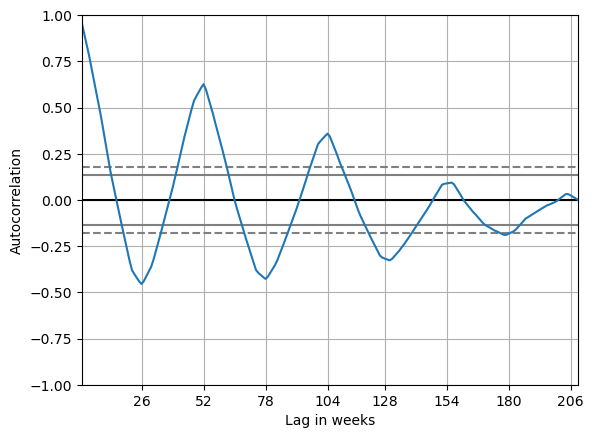

In [247]:
# How about an autocorrelation plot
ax = pd.plotting.autocorrelation_plot(train.sale_amount.resample('W').mean())
plt.xticks(ticks=[26,52,78,104,128,154,180,206])
plt.xlabel('Lag in weeks')
plt.show()

In [254]:
# How about seasonal decomposition
import statsmodels.api as sm

In [255]:
result = sm.tsa.seasonal_decompose(y.resample('W').mean())

In [259]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal':result.seasonal,
    'resid': result.resid
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,30.355667,NaN,-14.406312,NaN
2013-01-13,29.686286,NaN,-14.747474,NaN
2013-01-20,29.414286,NaN,-14.840886,NaN
2013-01-27,29.513714,NaN,-14.931698,NaN
2013-02-03,31.150571,NaN,-14.412598,NaN


<AxesSubplot:xlabel='sale_date'>

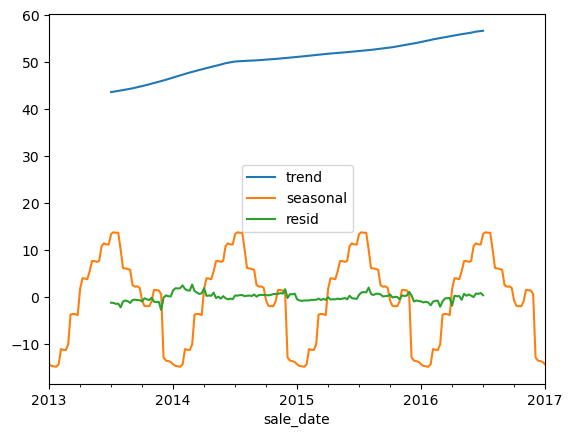

In [260]:
decomposition.iloc[:, 1:].plot()

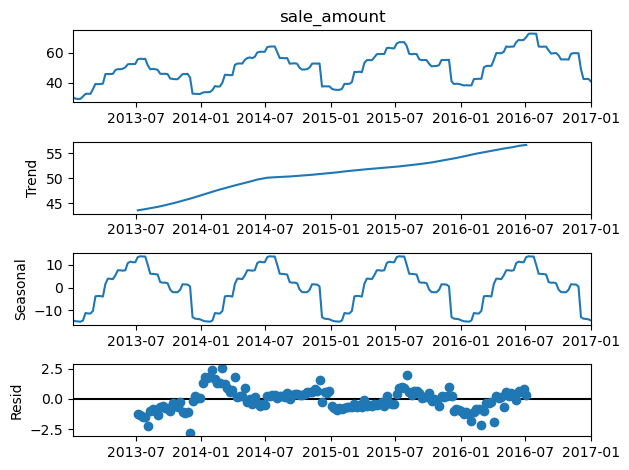

In [262]:
result.plot()
None

# German Power Data

In [268]:
df = p.wrangle_german_power_df()

csv file found and read


In [269]:
df.head()

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


<AxesSubplot:xlabel='date'>

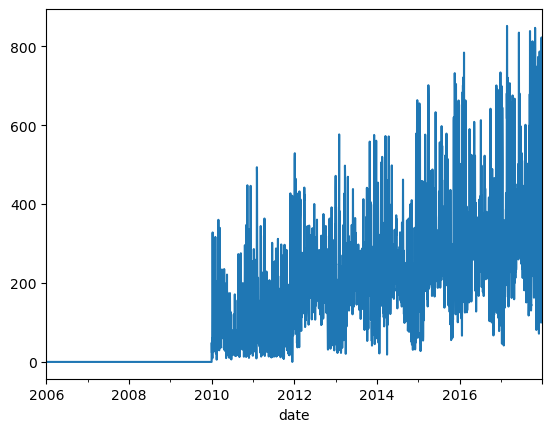

In [271]:
df.wind_and_solar.plot()

In [272]:
train = df.loc[:'2016']
test = df.loc['2017':]

In [273]:
train.tail()

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2016-12-27,1289.324,640.895,23.448,664.343,December,2016
2016-12-28,1294.881,214.990,19.450,234.440,December,2016
2016-12-29,1295.897,167.698,42.910,210.608,December,2016
2016-12-30,1291.044,239.257,48.546,287.803,December,2016
2016-12-31,1212.568,315.063,34.580,349.643,December,2016


In [274]:
test.head()

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2017-01-01,1130.413,307.125,35.291,342.416,January,2017
2017-01-02,1441.052,295.099,12.479,307.578,January,2017
2017-01-03,1529.990,666.173,9.351,675.524,January,2017
2017-01-04,1553.083,686.578,12.814,699.392,January,2017
2017-01-05,1547.238,261.758,20.797,282.555,January,2017


<AxesSubplot:ylabel='Frequency'>

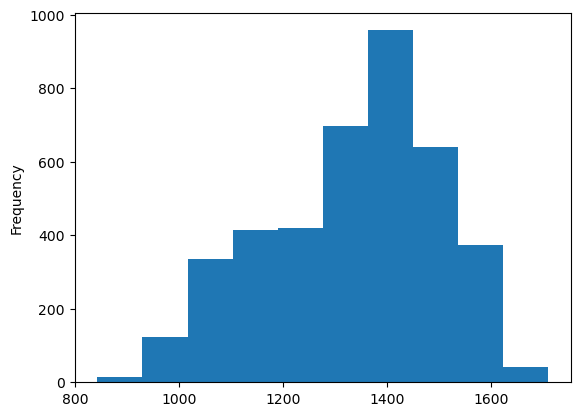

In [275]:
train.consumption.plot.hist()

<AxesSubplot:ylabel='Frequency'>

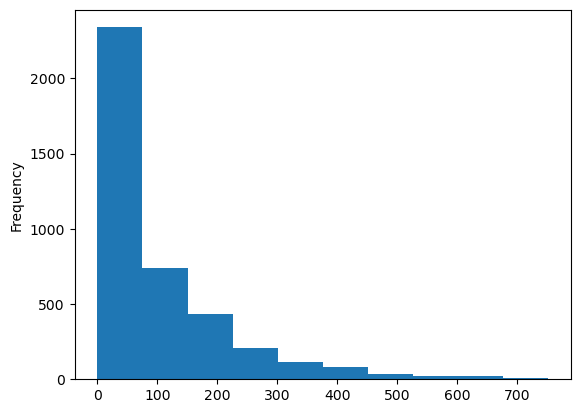

In [276]:
train.wind.plot.hist()

<AxesSubplot:ylabel='Frequency'>

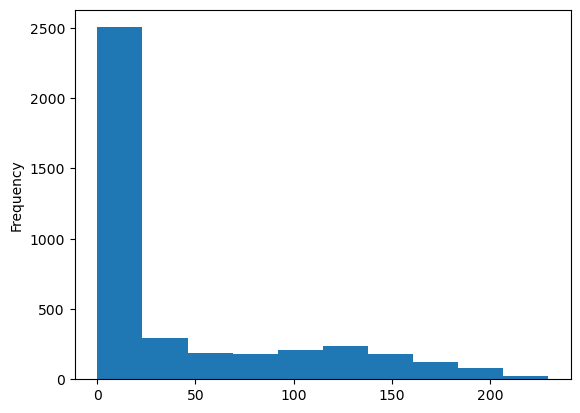

In [277]:
train.solar.plot.hist()

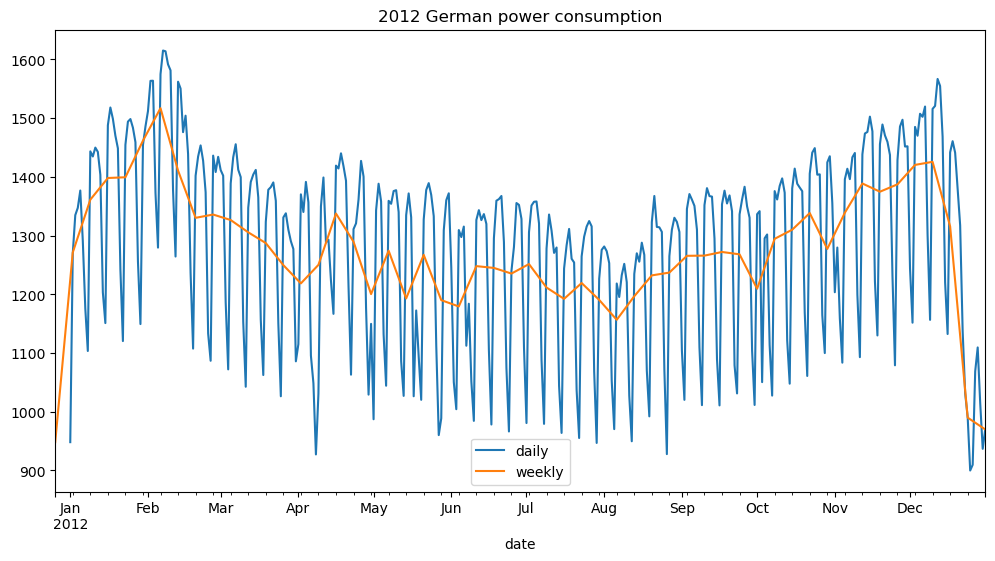

In [288]:
plt.figure(figsize=(12,6))
train[(train.index.year == 2012)].consumption.plot(label='daily')
train[(train.index.year == 2012)].consumption.resample('W').mean().plot(label='weekly')
plt.legend()
plt.title('2012 German power consumption')
plt.show()

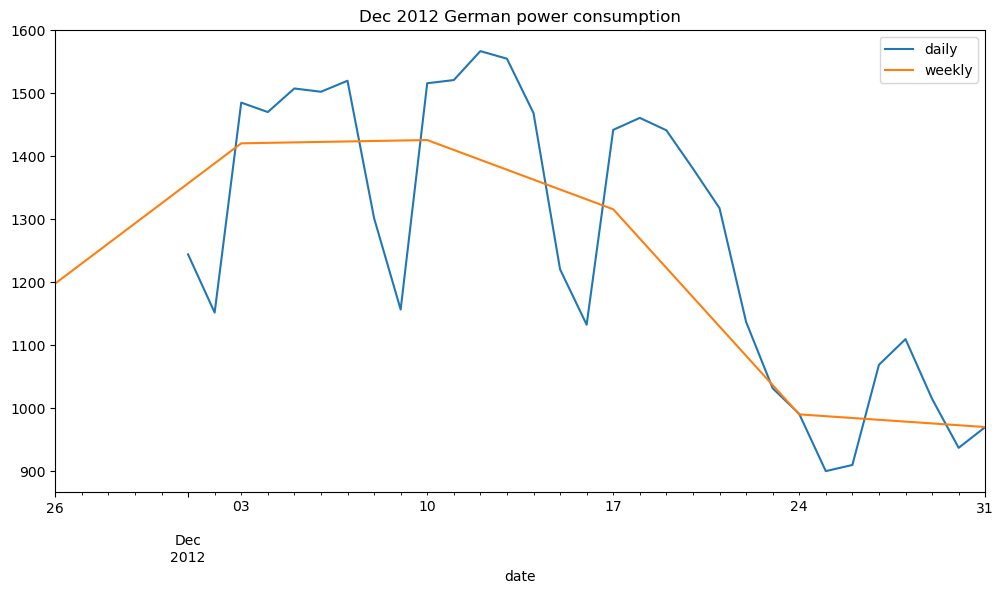

In [289]:
plt.figure(figsize=(12,6))
train[(train.index.year == 2012) & (train.index.month == 12)].consumption.plot(label='daily')
train[(train.index.year == 2012) & (train.index.month == 12)].consumption.resample('W').mean().plot(label='weekly')
plt.legend()
plt.title('Dec 2012 German power consumption')
plt.show()

In [286]:
train.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date', length=4018)

# Initial database found for individual project (FAA wildlife strike database)

In [24]:
w_df = pd.read_csv('strike_reports.csv', encoding='latin1')

/var/folders/mh/rqp8qf2s57730xvg9p4kf6500000gn/T/ipykernel_23679/1174204168.py:1: DtypeWarning: Columns (17,20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  w_df = pd.read_csv('strike_reports.csv', encoding='latin1')


In [25]:
w_df.head()

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,...,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608248,11/5/1993 0:00:00,11,1993,NaN,Dawn,KMCI,KANSAS CITY INTL,39.29761,-94.71391,...,NaN,NaN,NaN,"THIS MAY BE DUPL STRIKE FOR AIR MIDWEST, BUT T...",REDACTED,REDACTED,FAA Form 5200-7,NaN,5/13/1998 0:00:00,0
1,608249,7/2/1995 0:00:00,7,1995,NaN,NaN,KMCI,KANSAS CITY INTL,39.29761,-94.71391,...,NaN,NaN,NaN,/Legacy Record=100008/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007 0:00:00,0
2,608250,9/19/1990 0:00:00,9,1990,NaN,Day,KDFW,DALLAS/FORT WORTH INTL ARPT,32.89595,-97.03720,...,NaN,NaN,NaN,/Legacy Record=100009/,REDACTED,REDACTED,FAA Form 5200-7,Pilot,1/21/1999 0:00:00,0
3,608251,5/3/1992 0:00:00,5,1992,NaN,Day,KSJC,NORMAN Y. MINETA SAN JOSE INTL ARPT,37.36186,-121.92901,...,NaN,NaN,NaN,A/C = FAIRCHILD METRO II (5/8/14 UPDATED A/C) ...,REDACTED,REDACTED,FAA Form 5200-7,NaN,5/8/2014 0:00:00,0
4,608253,8/7/1990 0:00:00,8,1990,20:25,Night,KSTL,LAMBERT-ST LOUIS INTL,38.74769,-90.35999,...,NaN,NaN,NaN,OPER = DOUG HANN (3/1/12 UPDATED ID) /Legacy R...,REDACTED,REDACTED,FAA Form 5200-7,NaN,3/1/2012 0:00:00,0


In [307]:
1826 % 365

1

In [290]:
w_df.shape

(279947, 100)

In [298]:
w_df[w_df.airport_id == 'KSSF'].head()

,index_nr,incident_date,incident_month,incident_year,time,time_of_day,airport_id,airport,latitude,longitude,...,enroute_state,nr_injuries,nr_fatalities,comments,reported_name,reported_title,source,person,lupdate,transfer
18627,630172,8/8/1994 0:00:00,8,1994,NaN,Dusk,KSSF,STINSON MUNICIPAL ARPT,29.33701,-98.47114,...,NaN,1.0,NaN,SOURCE = TWO FAA ACCIDENT/INCIDENT FORMS (UPD...,REDACTED,REDACTED,Other,Other,5/7/2008 0:00:00,0
23838,636080,8/26/1999 0:00:00,8,1999,10:30,Day,KSSF,STINSON MUNICIPAL ARPT,29.33701,-98.47114,...,NaN,NaN,NaN,OPER = JON BEAN LETTER SENT ASKING FOR DETAILS...,REDACTED,REDACTED,AAIPN-1,Other,2/19/2002 0:00:00,0
82149,699455,12/3/2008 0:00:00,12,2008,NaN,Day,KSSF,STINSON MUNICIPAL ARPT,29.33701,-98.47114,...,NaN,NaN,NaN,OPER = WRIGHT FLYERS 2008-12-3-174936 /Legacy ...,REDACTED,REDACTED,FAA Form 5200-7-E,Pilot,4/27/2009 0:00:00,0
101160,719189,3/31/2011 0:00:00,3,2011,21:00,Night,KSSF,STINSON MUNICIPAL ARPT,29.33701,-98.47114,...,NaN,1.0,NaN,OPER = HELIFLIGHT LEASING/HELICOPTER EXPERTS I...,REDACTED,REDACTED,Multiple,Other,1/5/2012 0:00:00,0
165735,787872,5/29/2017 0:00:00,5,2017,01:38,Day,KSSF,STINSON MUNICIPAL ARPT,29.33701,-98.47114,...,NaN,NaN,NaN,"2017-5-29-221155, R1, C MIKESELL /Legacy Recor...",REDACTED,REDACTED,FAA Form 5200-7-E,Pilot,4/20/2018 0:00:00,0


In [291]:
w_df.columns = w_df.columns.str.lower()
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279947 entries, 0 to 279946
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index_nr               279947 non-null  int64  
 1   incident_date          279947 non-null  object 
 2   incident_month         279947 non-null  int64  
 3   incident_year          279947 non-null  int64  
 4   time                   156370 non-null  object 
 5   time_of_day            162273 non-null  object 
 6   airport_id             279942 non-null  object 
 7   airport                279947 non-null  object 
 8   latitude               245560 non-null  float64
 9   longitude              245561 non-null  float64
 10  runway                 212020 non-null  object 
 11  state                  245563 non-null  object 
 12  faaregion              245563 non-null  object 
 13  location               32868 non-null   object 
 14  opid                   279943 non-n

In [305]:
for col in w_df.columns:
    print(f'Value Counts for {col}')
    print(w_df[col].value_counts())
    print(f'Num of nulls: {w_df[col].isnull().sum()}')
    print(f'Num of NON-nulls: {w_df[col].notnull().sum()}')
    print()

Value Counts for index_nr
608248     1
813674     1
813680     1
813679     1
813678     1
          ..
711057     1
711058     1
711059     1
711060     1
1427951    1
Name: index_nr, Length: 279947, dtype: int64
Num of nulls: 0
Num of NON-nulls: 279947

Value Counts for incident_date
10/12/2018 0:00:00    140
10/27/2022 0:00:00    136
9/25/2019 0:00:00     129
10/4/2019 0:00:00     129
9/23/2022 0:00:00     128
                     ... 
3/29/1992 0:00:00       1
3/9/1990 0:00:00        1
1/22/1997 0:00:00       1
1/24/1995 0:00:00       1
5/17/2023 0:00:00       1
Name: incident_date, Length: 12129, dtype: int64
Num of nulls: 0
Num of NON-nulls: 279947

Value Counts for incident_month
8     39029
9     37479
7     35234
10    35116
5     26804
6     22884
4     20556
11    19292
3     13983
12    11078
1      9430
2      9062
Name: incident_month, dtype: int64
Num of nulls: 0
Num of NON-nulls: 279947

Value Counts for incident_year
2019    17342
2022    17203
2018    16205
2021    15